In [1]:
import torch
import torch.nn as nn
from torchvision import transforms, datasets
import matplotlib.pyplot as plt
%matplotlib inline
import argparse
import os
import torch.nn.functional as F

parser = argparse.ArgumentParser()
parser.add_argument('--gpu', type=str, default='0')
parser.add_argument('--epoch', type=int, default='64')
config = parser.parse_args(['--gpu', '0', '--epoch', '64'])

os.environ["CUDA_VISIBLE_DEVICES"] = str(config.gpu)
device = torch.device('cuda' if torch.cuda.is_available else 'cpu')
print(device)

latent_size = 64
hidden_size = 256
image_size = 784
num_epochs = 200
batch_size = 100

cuda


In [2]:
d = 32
class DC_Generator(nn.Module):
    def __init__(self):
        super(DC_Generator, self).__init__()
        self.deconv1 = nn.ConvTranspose2d(latent_size, 8 * d, 4, 1, 0)
        self.deconv1_bn = nn.BatchNorm2d(d * 8)
        self.deconv2 = nn.ConvTranspose2d(d * 8, d* 4, 4, 2, 1)
        self.deconv2_bn = nn.BatchNorm2d(d * 4)
        self.deconv3 = nn.ConvTranspose2d(d * 4, d * 2, 4, 2, 1)
        self.deconv3_bn = nn.BatchNorm2d(d * 2)
        self.deconv4 = nn.ConvTranspose2d(d * 2, d, 4, 2, 1)
        self.deconv4_bn = nn.BatchNorm2d(d)
        self.deconv5 = nn.ConvTranspose2d(d, 1, 4, 2, 1)
        
    def weight_init(self, mean, std):
        for name in self._modules:
            if isinstance(name, nn.ConvTranspose2d):
                name.wright.data.normal_(mean, std)
                name.bias.data.zero_()
                
    def forward(self, x):
        x = nn.ReLU()(self.deconv1_bn(self.deconv1(x)))
        x = nn.ReLU()(self.deconv2_bn(self.deconv2(x)))
        x = nn.ReLU()(self.deconv3_bn(self.deconv3(x)))
        x = nn.ReLU()(self.deconv4_bn(self.deconv4(x)))
        x = nn.Tanh()(self.deconv5(x))
        return x

class DC_Distinguisher(nn.Module):
    def __init__(self):
        super(DC_Distinguisher, self).__init__()
        self.conv1 = nn.Conv2d(1, d, 4, 2, 1)
        self.conv2 = nn.Conv2d(d, d * 2, 4, 2, 1)
        self.conv2_bn = nn.BatchNorm2d(d * 2)
        self.conv3 = nn.Conv2d(2 * d, 4 * d, 4, 2, 1)
        self.conv3_bn = nn.BatchNorm2d(4 * d)
        self.conv4 = nn.Conv2d(4 * d, 8 * d, 4, 2, 1)
        self.conv4_bn = nn.BatchNorm2d(8 * d)
        self.conv5 = nn.Conv2d(8 * d, 1, 4, 1, 0)
    
    def weight_init(self, mean, std):
        for name in self._modules:
            if isinstance(name, nn.Conv2d):
                name.wright.data.normal_(mean, std)
                name.bias.data.zero_()
    
    def forward(self, x):
        x = F.leaky_relu(self.conv1(x), 0.2)
        x = F.leaky_relu(self.conv2_bn(self.conv2(x)), 0.2)
        x = F.leaky_relu(self.conv3_bn(self.conv3(x)), 0.2)
        x = F.leaky_relu(self.conv4_bn(self.conv4(x)), 0.2)
        x = F.sigmoid(self.conv5(x))
        return x


preparation done
epoch: 0, step: 100, d_loss: 0.4627, g_loss:2.0954, real_score: 0.84,fake_score: 0.12
epoch: 0, step: 200, d_loss: 0.1207, g_loss:3.6358, real_score: 0.94,fake_score: 0.03
epoch: 0, step: 300, d_loss: 0.0554, g_loss:4.1234, real_score: 0.97,fake_score: 0.02
epoch: 0, step: 400, d_loss: 0.4199, g_loss:2.6535, real_score: 0.80,fake_score: 0.08
epoch: 0, step: 500, d_loss: 0.1537, g_loss:4.0944, real_score: 0.92,fake_score: 0.02
epoch: 0, step: 600, d_loss: 0.3690, g_loss:2.4763, real_score: 0.93,fake_score: 0.13
tensor([14], device='cuda:0')
tensor([[0.4231]], device='cuda:0', grad_fn=<IndexBackward>)


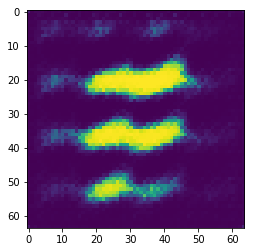

epoch: 1, step: 100, d_loss: 0.5018, g_loss:2.4431, real_score: 0.83,fake_score: 0.18
epoch: 1, step: 200, d_loss: 0.5351, g_loss:2.0563, real_score: 0.70,fake_score: 0.15
epoch: 1, step: 300, d_loss: 0.1166, g_loss:4.7429, real_score: 0.93,fake_score: 0.01
epoch: 1, step: 400, d_loss: 0.1002, g_loss:4.7889, real_score: 0.93,fake_score: 0.01
epoch: 1, step: 500, d_loss: 0.1480, g_loss:3.0240, real_score: 0.95,fake_score: 0.07
epoch: 1, step: 600, d_loss: 0.6614, g_loss:2.5043, real_score: 0.69,fake_score: 0.11
tensor([8], device='cuda:0')
tensor([[0.3911]], device='cuda:0', grad_fn=<IndexBackward>)


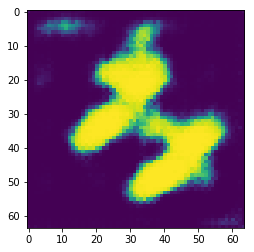

epoch: 2, step: 100, d_loss: 0.1123, g_loss:4.0535, real_score: 0.95,fake_score: 0.03
epoch: 2, step: 200, d_loss: 0.1627, g_loss:4.2898, real_score: 0.88,fake_score: 0.04
epoch: 2, step: 300, d_loss: 0.4992, g_loss:2.6581, real_score: 0.76,fake_score: 0.11
epoch: 2, step: 400, d_loss: 0.1637, g_loss:4.8690, real_score: 0.96,fake_score: 0.02
epoch: 2, step: 500, d_loss: 0.5556, g_loss:5.1747, real_score: 0.99,fake_score: 0.01
epoch: 2, step: 600, d_loss: 0.4691, g_loss:1.9258, real_score: 0.79,fake_score: 0.19
tensor([82], device='cuda:0')
tensor([[0.5278]], device='cuda:0', grad_fn=<IndexBackward>)


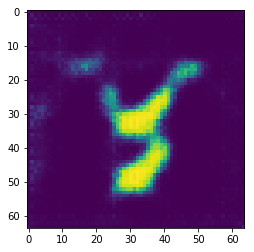

epoch: 3, step: 100, d_loss: 0.1107, g_loss:2.2690, real_score: 0.97,fake_score: 0.14
epoch: 3, step: 200, d_loss: 0.8828, g_loss:1.9322, real_score: 0.66,fake_score: 0.19
epoch: 3, step: 300, d_loss: 0.2700, g_loss:3.4105, real_score: 0.87,fake_score: 0.08
epoch: 3, step: 400, d_loss: 0.2200, g_loss:3.7805, real_score: 0.86,fake_score: 0.04
epoch: 3, step: 500, d_loss: 0.2822, g_loss:2.6288, real_score: 0.87,fake_score: 0.12
epoch: 3, step: 600, d_loss: 0.1141, g_loss:4.0518, real_score: 0.97,fake_score: 0.04
tensor([43], device='cuda:0')
tensor([[0.2492]], device='cuda:0', grad_fn=<IndexBackward>)


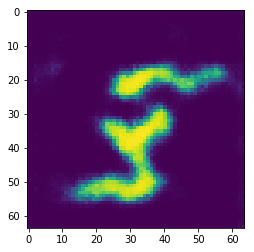

epoch: 4, step: 100, d_loss: 0.1123, g_loss:4.6095, real_score: 0.95,fake_score: 0.02
epoch: 4, step: 200, d_loss: 0.3823, g_loss:2.2330, real_score: 0.87,fake_score: 0.20
epoch: 4, step: 300, d_loss: 0.4666, g_loss:2.5407, real_score: 0.85,fake_score: 0.12
epoch: 4, step: 400, d_loss: 0.1239, g_loss:3.9681, real_score: 0.92,fake_score: 0.03
epoch: 4, step: 500, d_loss: 0.3553, g_loss:2.8698, real_score: 0.81,fake_score: 0.09
epoch: 4, step: 600, d_loss: 0.2772, g_loss:3.0509, real_score: 0.95,fake_score: 0.08
tensor([76], device='cuda:0')
tensor([[0.4152]], device='cuda:0', grad_fn=<IndexBackward>)


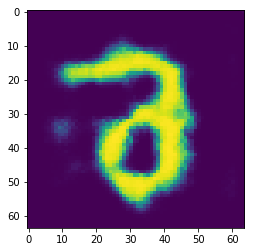

epoch: 5, step: 100, d_loss: 0.1286, g_loss:3.6492, real_score: 0.98,fake_score: 0.05
epoch: 5, step: 200, d_loss: 0.2118, g_loss:2.6397, real_score: 0.89,fake_score: 0.11
epoch: 5, step: 300, d_loss: 0.3918, g_loss:3.0653, real_score: 0.77,fake_score: 0.06
epoch: 5, step: 400, d_loss: 0.1117, g_loss:2.3190, real_score: 0.96,fake_score: 0.14
epoch: 5, step: 500, d_loss: 0.3108, g_loss:6.7174, real_score: 0.79,fake_score: 0.00
epoch: 5, step: 600, d_loss: 0.1634, g_loss:4.3608, real_score: 0.89,fake_score: 0.03
tensor([9], device='cuda:0')
tensor([[0.2308]], device='cuda:0', grad_fn=<IndexBackward>)


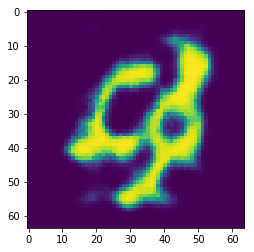

epoch: 6, step: 100, d_loss: 0.1478, g_loss:3.9466, real_score: 0.95,fake_score: 0.03
epoch: 6, step: 200, d_loss: 0.1797, g_loss:2.3988, real_score: 0.89,fake_score: 0.18
epoch: 6, step: 300, d_loss: 0.0400, g_loss:3.7737, real_score: 0.98,fake_score: 0.04
epoch: 6, step: 400, d_loss: 0.2595, g_loss:4.6627, real_score: 0.95,fake_score: 0.02
epoch: 6, step: 500, d_loss: 0.1815, g_loss:2.9926, real_score: 0.91,fake_score: 0.08
epoch: 6, step: 600, d_loss: 0.2852, g_loss:1.9662, real_score: 0.85,fake_score: 0.19
tensor([88], device='cuda:0')
tensor([[0.7713]], device='cuda:0', grad_fn=<IndexBackward>)


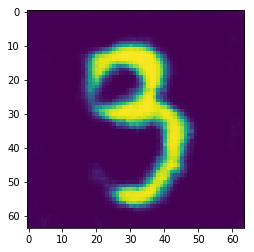

epoch: 7, step: 100, d_loss: 0.3061, g_loss:4.0056, real_score: 0.86,fake_score: 0.05
epoch: 7, step: 200, d_loss: 0.2644, g_loss:4.9081, real_score: 0.83,fake_score: 0.02
epoch: 7, step: 300, d_loss: 0.4676, g_loss:3.1029, real_score: 0.82,fake_score: 0.07
epoch: 7, step: 400, d_loss: 0.1502, g_loss:3.7722, real_score: 0.94,fake_score: 0.05
epoch: 7, step: 500, d_loss: 0.2153, g_loss:2.6369, real_score: 0.90,fake_score: 0.10
epoch: 7, step: 600, d_loss: 0.3452, g_loss:2.9685, real_score: 0.80,fake_score: 0.10
tensor([67], device='cuda:0')
tensor([[0.6918]], device='cuda:0', grad_fn=<IndexBackward>)


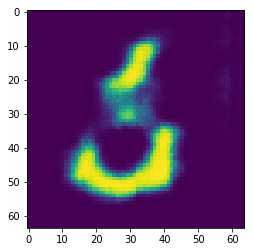

epoch: 8, step: 100, d_loss: 0.2609, g_loss:1.1673, real_score: 0.98,fake_score: 0.36
epoch: 8, step: 200, d_loss: 0.0967, g_loss:4.1417, real_score: 0.95,fake_score: 0.02
epoch: 8, step: 300, d_loss: 0.1107, g_loss:4.1525, real_score: 0.94,fake_score: 0.03
epoch: 8, step: 400, d_loss: 0.1395, g_loss:4.0966, real_score: 0.91,fake_score: 0.04
epoch: 8, step: 500, d_loss: 0.3821, g_loss:2.3436, real_score: 0.77,fake_score: 0.16
epoch: 8, step: 600, d_loss: 0.4001, g_loss:6.0570, real_score: 0.80,fake_score: 0.01
tensor([41], device='cuda:0')
tensor([[0.1399]], device='cuda:0', grad_fn=<IndexBackward>)


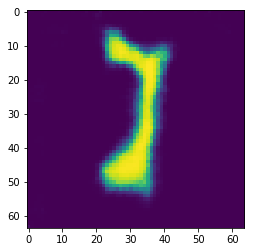

epoch: 9, step: 100, d_loss: 0.1896, g_loss:3.5857, real_score: 0.91,fake_score: 0.05
epoch: 9, step: 200, d_loss: 0.3628, g_loss:1.9947, real_score: 0.88,fake_score: 0.19
epoch: 9, step: 300, d_loss: 0.2066, g_loss:3.1314, real_score: 0.90,fake_score: 0.08
epoch: 9, step: 400, d_loss: 0.3511, g_loss:3.0426, real_score: 0.98,fake_score: 0.08
epoch: 9, step: 500, d_loss: 0.5117, g_loss:1.8123, real_score: 0.98,fake_score: 0.26
epoch: 9, step: 600, d_loss: 0.2802, g_loss:2.5635, real_score: 0.85,fake_score: 0.14
tensor([89], device='cuda:0')
tensor([[0.6170]], device='cuda:0', grad_fn=<IndexBackward>)


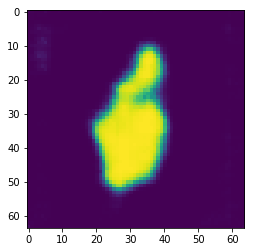

epoch: 10, step: 100, d_loss: 0.3954, g_loss:1.3916, real_score: 0.89,fake_score: 0.33
epoch: 10, step: 200, d_loss: 0.3150, g_loss:2.4502, real_score: 0.95,fake_score: 0.14
epoch: 10, step: 300, d_loss: 0.3079, g_loss:3.0259, real_score: 0.95,fake_score: 0.07
epoch: 10, step: 400, d_loss: 0.2432, g_loss:4.1405, real_score: 0.93,fake_score: 0.03
epoch: 10, step: 500, d_loss: 0.3589, g_loss:3.7472, real_score: 0.91,fake_score: 0.05
epoch: 10, step: 600, d_loss: 0.2808, g_loss:3.8881, real_score: 0.87,fake_score: 0.03
tensor([93], device='cuda:0')
tensor([[0.2659]], device='cuda:0', grad_fn=<IndexBackward>)


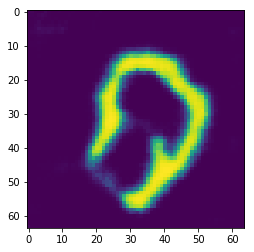

epoch: 11, step: 100, d_loss: 0.4629, g_loss:2.5904, real_score: 0.89,fake_score: 0.12
epoch: 11, step: 200, d_loss: 0.3468, g_loss:5.1344, real_score: 0.80,fake_score: 0.01
epoch: 11, step: 300, d_loss: 0.3403, g_loss:2.6393, real_score: 0.97,fake_score: 0.12
epoch: 11, step: 400, d_loss: 0.4084, g_loss:3.8769, real_score: 0.82,fake_score: 0.04
epoch: 11, step: 500, d_loss: 0.3781, g_loss:4.2605, real_score: 0.87,fake_score: 0.03
epoch: 11, step: 600, d_loss: 0.3463, g_loss:3.6574, real_score: 0.84,fake_score: 0.04
tensor([51], device='cuda:0')
tensor([[0.4427]], device='cuda:0', grad_fn=<IndexBackward>)


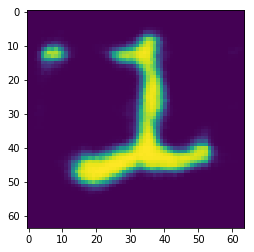

epoch: 12, step: 100, d_loss: 0.3357, g_loss:3.2350, real_score: 0.95,fake_score: 0.07
epoch: 12, step: 200, d_loss: 0.2538, g_loss:2.5196, real_score: 0.91,fake_score: 0.12
epoch: 12, step: 300, d_loss: 0.2509, g_loss:1.2767, real_score: 0.87,fake_score: 0.38
epoch: 12, step: 400, d_loss: 0.1663, g_loss:1.9790, real_score: 0.94,fake_score: 0.21
epoch: 12, step: 500, d_loss: 0.2353, g_loss:4.3083, real_score: 0.85,fake_score: 0.03
epoch: 12, step: 600, d_loss: 0.2620, g_loss:3.2337, real_score: 0.88,fake_score: 0.07
tensor([92], device='cuda:0')
tensor([[0.6133]], device='cuda:0', grad_fn=<IndexBackward>)


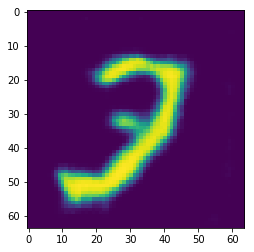

epoch: 13, step: 100, d_loss: 0.6190, g_loss:2.5661, real_score: 0.70,fake_score: 0.13
epoch: 13, step: 200, d_loss: 0.2824, g_loss:2.5308, real_score: 0.88,fake_score: 0.13
epoch: 13, step: 300, d_loss: 0.2875, g_loss:2.2171, real_score: 0.96,fake_score: 0.16
epoch: 13, step: 400, d_loss: 0.3211, g_loss:2.8782, real_score: 0.96,fake_score: 0.10
epoch: 13, step: 500, d_loss: 0.3160, g_loss:4.3220, real_score: 0.82,fake_score: 0.02
epoch: 13, step: 600, d_loss: 0.3309, g_loss:4.1580, real_score: 0.87,fake_score: 0.03
tensor([75], device='cuda:0')
tensor([[0.2759]], device='cuda:0', grad_fn=<IndexBackward>)


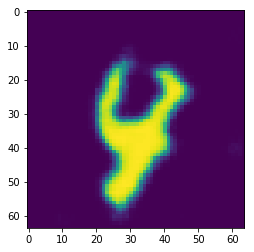

epoch: 14, step: 100, d_loss: 0.3726, g_loss:3.5986, real_score: 0.85,fake_score: 0.05
epoch: 14, step: 200, d_loss: 0.2668, g_loss:3.0918, real_score: 0.82,fake_score: 0.07
epoch: 14, step: 300, d_loss: 0.3417, g_loss:3.2143, real_score: 0.77,fake_score: 0.07
epoch: 14, step: 400, d_loss: 0.4135, g_loss:2.8232, real_score: 0.79,fake_score: 0.09
epoch: 14, step: 500, d_loss: 0.4582, g_loss:2.6828, real_score: 0.98,fake_score: 0.13
epoch: 14, step: 600, d_loss: 0.7224, g_loss:3.2040, real_score: 0.96,fake_score: 0.07
tensor([70], device='cuda:0')
tensor([[0.6778]], device='cuda:0', grad_fn=<IndexBackward>)


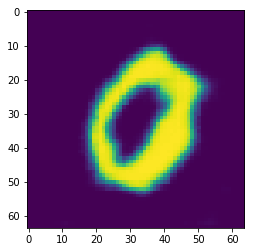

epoch: 15, step: 100, d_loss: 0.3928, g_loss:2.1301, real_score: 0.81,fake_score: 0.18
epoch: 15, step: 200, d_loss: 0.2661, g_loss:2.8114, real_score: 0.94,fake_score: 0.11
epoch: 15, step: 300, d_loss: 0.4329, g_loss:2.9453, real_score: 0.91,fake_score: 0.08
epoch: 15, step: 400, d_loss: 0.3091, g_loss:2.5184, real_score: 0.81,fake_score: 0.13
epoch: 15, step: 500, d_loss: 0.5474, g_loss:3.4047, real_score: 0.94,fake_score: 0.07
epoch: 15, step: 600, d_loss: 0.8102, g_loss:1.6592, real_score: 0.58,fake_score: 0.28
tensor([98], device='cuda:0')
tensor([[0.9400]], device='cuda:0', grad_fn=<IndexBackward>)


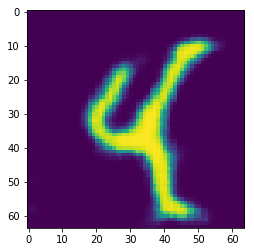

epoch: 16, step: 100, d_loss: 0.7898, g_loss:1.9566, real_score: 0.90,fake_score: 0.18
epoch: 16, step: 200, d_loss: 0.4234, g_loss:2.0303, real_score: 0.85,fake_score: 0.21
epoch: 16, step: 300, d_loss: 0.7879, g_loss:2.4862, real_score: 0.94,fake_score: 0.14
epoch: 16, step: 400, d_loss: 0.8699, g_loss:1.8501, real_score: 0.93,fake_score: 0.22
epoch: 16, step: 500, d_loss: 0.4714, g_loss:3.1852, real_score: 0.86,fake_score: 0.07
epoch: 16, step: 600, d_loss: 0.7446, g_loss:2.6407, real_score: 0.98,fake_score: 0.11
tensor([42], device='cuda:0')
tensor([[0.5873]], device='cuda:0', grad_fn=<IndexBackward>)


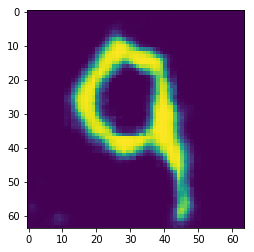

epoch: 17, step: 100, d_loss: 0.2357, g_loss:2.5487, real_score: 0.87,fake_score: 0.11
epoch: 17, step: 200, d_loss: 0.4611, g_loss:2.9751, real_score: 0.79,fake_score: 0.08
epoch: 17, step: 300, d_loss: 0.5399, g_loss:3.2045, real_score: 0.94,fake_score: 0.07
epoch: 17, step: 400, d_loss: 0.6692, g_loss:2.4846, real_score: 0.66,fake_score: 0.13
epoch: 17, step: 500, d_loss: 0.4652, g_loss:1.5272, real_score: 0.75,fake_score: 0.29
epoch: 17, step: 600, d_loss: 0.9212, g_loss:1.4687, real_score: 0.56,fake_score: 0.32
tensor([8], device='cuda:0')
tensor([[0.8421]], device='cuda:0', grad_fn=<IndexBackward>)


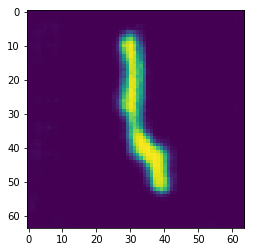

epoch: 18, step: 100, d_loss: 0.3902, g_loss:1.3274, real_score: 0.87,fake_score: 0.33
epoch: 18, step: 200, d_loss: 0.7911, g_loss:2.7038, real_score: 0.81,fake_score: 0.10
epoch: 18, step: 300, d_loss: 0.7559, g_loss:3.1426, real_score: 0.90,fake_score: 0.07
epoch: 18, step: 400, d_loss: 0.4875, g_loss:1.4851, real_score: 0.72,fake_score: 0.30
epoch: 18, step: 500, d_loss: 0.3607, g_loss:3.8226, real_score: 0.80,fake_score: 0.03
epoch: 18, step: 600, d_loss: 0.3017, g_loss:4.7438, real_score: 0.96,fake_score: 0.02
tensor([97], device='cuda:0')
tensor([[0.1045]], device='cuda:0', grad_fn=<IndexBackward>)


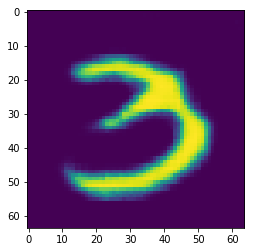

epoch: 19, step: 100, d_loss: 0.4023, g_loss:2.6359, real_score: 0.94,fake_score: 0.12
epoch: 19, step: 200, d_loss: 0.8041, g_loss:1.3662, real_score: 0.93,fake_score: 0.33
epoch: 19, step: 300, d_loss: 0.9281, g_loss:1.7617, real_score: 0.92,fake_score: 0.24
epoch: 19, step: 400, d_loss: 0.5876, g_loss:2.8422, real_score: 0.70,fake_score: 0.10
epoch: 19, step: 500, d_loss: 0.4911, g_loss:1.8126, real_score: 0.90,fake_score: 0.23
epoch: 19, step: 600, d_loss: 0.4067, g_loss:2.3566, real_score: 0.90,fake_score: 0.14
tensor([48], device='cuda:0')
tensor([[0.5862]], device='cuda:0', grad_fn=<IndexBackward>)


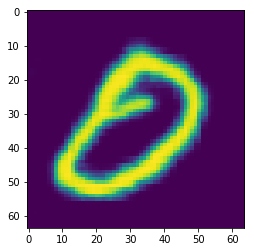

epoch: 20, step: 100, d_loss: 0.7419, g_loss:2.6938, real_score: 0.55,fake_score: 0.10
epoch: 20, step: 200, d_loss: 0.4886, g_loss:2.8614, real_score: 0.91,fake_score: 0.09
epoch: 20, step: 300, d_loss: 0.2936, g_loss:2.5197, real_score: 0.90,fake_score: 0.11
epoch: 20, step: 400, d_loss: 0.6830, g_loss:2.4446, real_score: 0.95,fake_score: 0.13
epoch: 20, step: 500, d_loss: 0.5801, g_loss:3.0831, real_score: 0.65,fake_score: 0.08
epoch: 20, step: 600, d_loss: 0.2994, g_loss:1.3876, real_score: 0.87,fake_score: 0.33
tensor([26], device='cuda:0')
tensor([[0.8367]], device='cuda:0', grad_fn=<IndexBackward>)


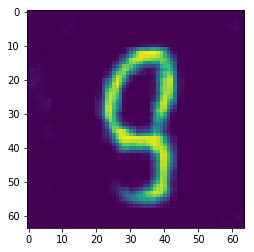

epoch: 21, step: 100, d_loss: 0.3507, g_loss:3.9765, real_score: 0.77,fake_score: 0.03
epoch: 21, step: 200, d_loss: 0.3371, g_loss:2.9416, real_score: 0.97,fake_score: 0.09
epoch: 21, step: 300, d_loss: 0.4434, g_loss:2.0187, real_score: 0.72,fake_score: 0.19
epoch: 21, step: 400, d_loss: 0.7240, g_loss:2.8758, real_score: 0.61,fake_score: 0.09
epoch: 21, step: 500, d_loss: 0.3489, g_loss:1.0177, real_score: 0.96,fake_score: 0.44
epoch: 21, step: 600, d_loss: 0.5039, g_loss:2.9903, real_score: 0.72,fake_score: 0.08
tensor([84], device='cuda:0')
tensor([[0.6510]], device='cuda:0', grad_fn=<IndexBackward>)


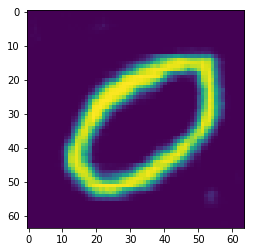

epoch: 22, step: 100, d_loss: 0.3803, g_loss:2.6473, real_score: 0.84,fake_score: 0.11
epoch: 22, step: 200, d_loss: 0.3522, g_loss:3.2566, real_score: 0.78,fake_score: 0.07
epoch: 22, step: 300, d_loss: 0.2936, g_loss:4.8880, real_score: 0.95,fake_score: 0.01
epoch: 22, step: 400, d_loss: 0.2919, g_loss:3.5797, real_score: 0.84,fake_score: 0.05
epoch: 22, step: 500, d_loss: 0.8975, g_loss:3.1647, real_score: 0.93,fake_score: 0.07
epoch: 22, step: 600, d_loss: 0.4726, g_loss:2.0369, real_score: 0.81,fake_score: 0.19
tensor([4], device='cuda:0')
tensor([[0.6669]], device='cuda:0', grad_fn=<IndexBackward>)


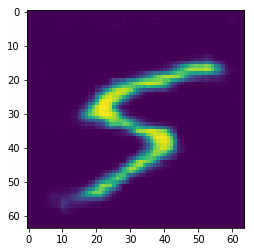

epoch: 23, step: 100, d_loss: 0.3403, g_loss:3.1345, real_score: 0.95,fake_score: 0.07
epoch: 23, step: 200, d_loss: 0.2454, g_loss:0.8227, real_score: 0.98,fake_score: 0.49
epoch: 23, step: 300, d_loss: 0.3864, g_loss:4.2003, real_score: 0.84,fake_score: 0.02
epoch: 23, step: 400, d_loss: 0.1408, g_loss:3.4223, real_score: 0.92,fake_score: 0.06
epoch: 23, step: 500, d_loss: 0.1913, g_loss:2.4941, real_score: 0.92,fake_score: 0.12
epoch: 23, step: 600, d_loss: 0.1804, g_loss:5.4314, real_score: 0.87,fake_score: 0.01
tensor([29], device='cuda:0')
tensor([[0.1961]], device='cuda:0', grad_fn=<IndexBackward>)


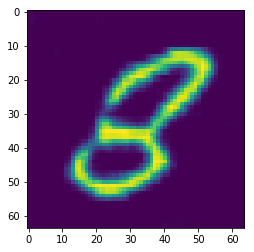

epoch: 24, step: 100, d_loss: 0.1482, g_loss:3.7978, real_score: 0.90,fake_score: 0.04
epoch: 24, step: 200, d_loss: 0.8032, g_loss:2.8985, real_score: 0.53,fake_score: 0.09
epoch: 24, step: 300, d_loss: 0.4691, g_loss:1.7630, real_score: 0.92,fake_score: 0.26
epoch: 24, step: 400, d_loss: 0.9524, g_loss:3.2064, real_score: 0.88,fake_score: 0.08
epoch: 24, step: 500, d_loss: 0.4284, g_loss:5.0270, real_score: 0.73,fake_score: 0.01
epoch: 24, step: 600, d_loss: 0.3642, g_loss:2.3241, real_score: 0.79,fake_score: 0.15
tensor([53], device='cuda:0')
tensor([[0.6633]], device='cuda:0', grad_fn=<IndexBackward>)


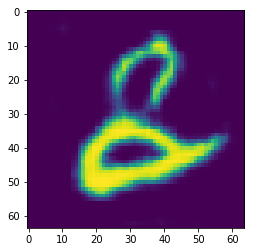

epoch: 25, step: 100, d_loss: 0.6378, g_loss:2.6129, real_score: 0.64,fake_score: 0.11
epoch: 25, step: 200, d_loss: 0.2187, g_loss:3.0028, real_score: 0.91,fake_score: 0.09
epoch: 25, step: 300, d_loss: 0.1440, g_loss:0.8848, real_score: 0.98,fake_score: 0.49
epoch: 25, step: 400, d_loss: 0.2435, g_loss:2.4775, real_score: 0.88,fake_score: 0.12
epoch: 25, step: 500, d_loss: 0.1521, g_loss:4.3842, real_score: 0.93,fake_score: 0.02
epoch: 25, step: 600, d_loss: 0.1039, g_loss:4.9043, real_score: 0.97,fake_score: 0.01
tensor([35], device='cuda:0')
tensor([[0.0773]], device='cuda:0', grad_fn=<IndexBackward>)


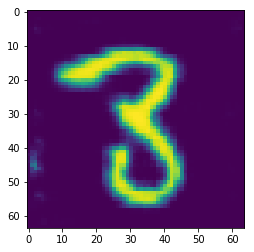

epoch: 26, step: 100, d_loss: 0.0657, g_loss:3.1479, real_score: 0.96,fake_score: 0.07
epoch: 26, step: 200, d_loss: 0.1284, g_loss:1.8812, real_score: 0.96,fake_score: 0.22
epoch: 26, step: 300, d_loss: 0.0999, g_loss:2.5550, real_score: 0.95,fake_score: 0.11
epoch: 26, step: 400, d_loss: 0.5618, g_loss:2.5200, real_score: 0.99,fake_score: 0.13
epoch: 26, step: 500, d_loss: 0.4162, g_loss:3.9718, real_score: 0.97,fake_score: 0.04
epoch: 26, step: 600, d_loss: 0.2138, g_loss:3.6415, real_score: 0.87,fake_score: 0.06
tensor([6], device='cuda:0')
tensor([[0.7394]], device='cuda:0', grad_fn=<IndexBackward>)


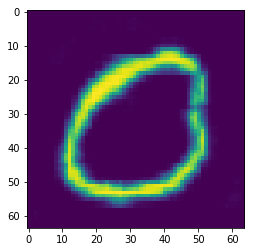

epoch: 27, step: 100, d_loss: 0.0917, g_loss:2.9867, real_score: 0.99,fake_score: 0.09
epoch: 27, step: 200, d_loss: 0.1093, g_loss:3.6156, real_score: 0.96,fake_score: 0.05
epoch: 27, step: 300, d_loss: 0.1626, g_loss:2.7184, real_score: 0.91,fake_score: 0.11
epoch: 27, step: 400, d_loss: 0.6370, g_loss:5.7175, real_score: 0.97,fake_score: 0.01
epoch: 27, step: 500, d_loss: 1.5342, g_loss:2.4914, real_score: 0.31,fake_score: 0.14
epoch: 27, step: 600, d_loss: 0.3239, g_loss:3.7630, real_score: 0.82,fake_score: 0.05
tensor([42], device='cuda:0')
tensor([[0.4962]], device='cuda:0', grad_fn=<IndexBackward>)


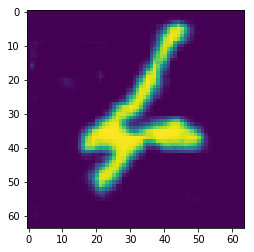

epoch: 28, step: 100, d_loss: 0.2246, g_loss:4.2870, real_score: 0.84,fake_score: 0.03
epoch: 28, step: 200, d_loss: 0.1271, g_loss:5.5440, real_score: 0.92,fake_score: 0.01
epoch: 28, step: 300, d_loss: 0.1179, g_loss:5.1341, real_score: 0.95,fake_score: 0.01
epoch: 28, step: 400, d_loss: 0.0680, g_loss:4.2754, real_score: 0.97,fake_score: 0.03
epoch: 28, step: 500, d_loss: 0.1401, g_loss:3.5524, real_score: 0.97,fake_score: 0.05
epoch: 28, step: 600, d_loss: 0.0501, g_loss:3.7234, real_score: 0.98,fake_score: 0.04
tensor([50], device='cuda:0')
tensor([[0.3001]], device='cuda:0', grad_fn=<IndexBackward>)


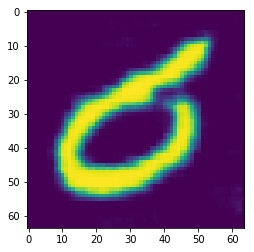

epoch: 29, step: 100, d_loss: 0.7322, g_loss:5.2989, real_score: 1.00,fake_score: 0.01
epoch: 29, step: 200, d_loss: 0.4157, g_loss:2.5402, real_score: 0.96,fake_score: 0.14
epoch: 29, step: 300, d_loss: 0.0980, g_loss:4.9446, real_score: 0.96,fake_score: 0.01
epoch: 29, step: 400, d_loss: 0.0832, g_loss:3.9167, real_score: 0.95,fake_score: 0.04
epoch: 29, step: 500, d_loss: 0.0769, g_loss:4.3799, real_score: 0.94,fake_score: 0.02
epoch: 29, step: 600, d_loss: 0.1687, g_loss:5.2171, real_score: 0.87,fake_score: 0.01
tensor([97], device='cuda:0')
tensor([[0.2218]], device='cuda:0', grad_fn=<IndexBackward>)


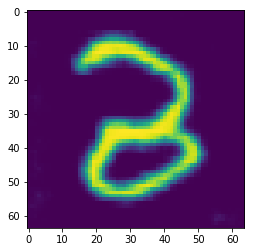

epoch: 30, step: 100, d_loss: 0.0437, g_loss:5.0076, real_score: 0.98,fake_score: 0.01
epoch: 30, step: 200, d_loss: 0.1012, g_loss:3.2078, real_score: 1.00,fake_score: 0.07
epoch: 30, step: 300, d_loss: 0.0524, g_loss:6.3933, real_score: 0.97,fake_score: 0.00
epoch: 30, step: 400, d_loss: 0.0903, g_loss:2.7569, real_score: 0.98,fake_score: 0.10
epoch: 30, step: 500, d_loss: 0.1157, g_loss:3.4948, real_score: 0.96,fake_score: 0.05
epoch: 30, step: 600, d_loss: 0.1061, g_loss:3.8132, real_score: 0.96,fake_score: 0.04
tensor([69], device='cuda:0')
tensor([[0.3568]], device='cuda:0', grad_fn=<IndexBackward>)


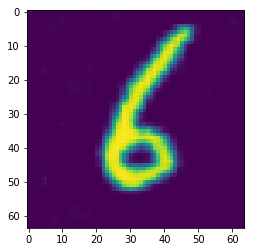

epoch: 31, step: 100, d_loss: 0.0687, g_loss:5.5304, real_score: 0.98,fake_score: 0.01
epoch: 31, step: 200, d_loss: 0.0481, g_loss:2.5612, real_score: 0.98,fake_score: 0.13
epoch: 31, step: 300, d_loss: 0.4533, g_loss:5.0987, real_score: 0.93,fake_score: 0.01
epoch: 31, step: 400, d_loss: 1.0872, g_loss:1.2396, real_score: 0.97,fake_score: 0.40
epoch: 31, step: 500, d_loss: 0.1797, g_loss:3.2775, real_score: 0.92,fake_score: 0.08
epoch: 31, step: 600, d_loss: 0.4110, g_loss:3.9810, real_score: 0.72,fake_score: 0.04
tensor([84], device='cuda:0')
tensor([[0.4764]], device='cuda:0', grad_fn=<IndexBackward>)


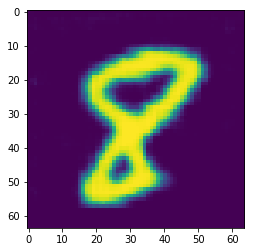

epoch: 32, step: 100, d_loss: 0.6065, g_loss:0.5327, real_score: 0.88,fake_score: 0.66
epoch: 32, step: 200, d_loss: 0.6171, g_loss:1.9816, real_score: 0.98,fake_score: 0.21
epoch: 32, step: 300, d_loss: 0.2041, g_loss:2.8435, real_score: 0.98,fake_score: 0.10
epoch: 32, step: 400, d_loss: 0.1224, g_loss:2.6502, real_score: 0.97,fake_score: 0.12
epoch: 32, step: 500, d_loss: 0.1184, g_loss:4.2763, real_score: 0.99,fake_score: 0.03
epoch: 32, step: 600, d_loss: 0.0580, g_loss:3.4447, real_score: 0.97,fake_score: 0.05
tensor([50], device='cuda:0')
tensor([[0.2219]], device='cuda:0', grad_fn=<IndexBackward>)


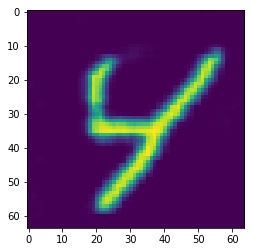

epoch: 33, step: 100, d_loss: 0.1904, g_loss:3.6167, real_score: 0.85,fake_score: 0.05
epoch: 33, step: 200, d_loss: 0.0438, g_loss:3.7270, real_score: 0.98,fake_score: 0.04
epoch: 33, step: 300, d_loss: 0.0915, g_loss:2.9995, real_score: 0.93,fake_score: 0.07
epoch: 33, step: 400, d_loss: 0.0344, g_loss:5.2238, real_score: 0.98,fake_score: 0.01
epoch: 33, step: 500, d_loss: 0.5970, g_loss:4.9519, real_score: 0.61,fake_score: 0.02
epoch: 33, step: 600, d_loss: 0.0883, g_loss:4.7580, real_score: 0.99,fake_score: 0.02
tensor([17], device='cuda:0')
tensor([[0.1201]], device='cuda:0', grad_fn=<IndexBackward>)


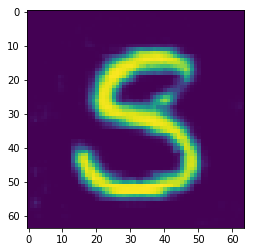

epoch: 34, step: 100, d_loss: 0.0838, g_loss:6.7801, real_score: 0.94,fake_score: 0.00
epoch: 34, step: 200, d_loss: 0.0470, g_loss:4.9144, real_score: 0.96,fake_score: 0.01
epoch: 34, step: 300, d_loss: 0.0404, g_loss:4.4534, real_score: 0.97,fake_score: 0.03
epoch: 34, step: 400, d_loss: 0.0467, g_loss:4.8565, real_score: 0.97,fake_score: 0.02
epoch: 34, step: 500, d_loss: 0.0328, g_loss:5.3662, real_score: 0.99,fake_score: 0.01
epoch: 34, step: 600, d_loss: 0.3632, g_loss:4.3988, real_score: 0.76,fake_score: 0.02
tensor([69], device='cuda:0')
tensor([[0.1506]], device='cuda:0', grad_fn=<IndexBackward>)


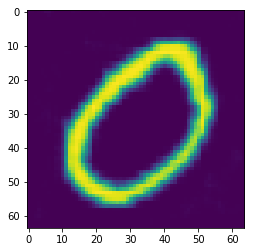

epoch: 35, step: 100, d_loss: 0.1314, g_loss:4.1386, real_score: 0.99,fake_score: 0.04
epoch: 35, step: 200, d_loss: 0.1496, g_loss:6.1037, real_score: 0.90,fake_score: 0.01
epoch: 35, step: 300, d_loss: 0.0468, g_loss:5.0305, real_score: 0.97,fake_score: 0.01
epoch: 35, step: 400, d_loss: 0.0493, g_loss:3.3832, real_score: 0.99,fake_score: 0.07
epoch: 35, step: 500, d_loss: 0.1518, g_loss:7.3255, real_score: 0.88,fake_score: 0.00
epoch: 35, step: 600, d_loss: 0.0399, g_loss:5.0151, real_score: 0.98,fake_score: 0.01
tensor([48], device='cuda:0')
tensor([[0.1059]], device='cuda:0', grad_fn=<IndexBackward>)


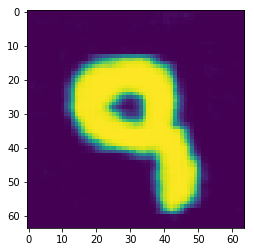

epoch: 36, step: 100, d_loss: 0.0292, g_loss:5.3018, real_score: 0.99,fake_score: 0.01
epoch: 36, step: 200, d_loss: 0.0379, g_loss:3.5982, real_score: 0.99,fake_score: 0.06
epoch: 36, step: 300, d_loss: 0.0391, g_loss:5.8195, real_score: 0.96,fake_score: 0.01
epoch: 36, step: 400, d_loss: 0.0173, g_loss:4.7670, real_score: 0.99,fake_score: 0.02
epoch: 36, step: 500, d_loss: 0.0967, g_loss:8.7734, real_score: 0.92,fake_score: 0.00
epoch: 36, step: 600, d_loss: 0.0220, g_loss:5.3922, real_score: 0.99,fake_score: 0.01
tensor([39], device='cuda:0')
tensor([[0.1439]], device='cuda:0', grad_fn=<IndexBackward>)


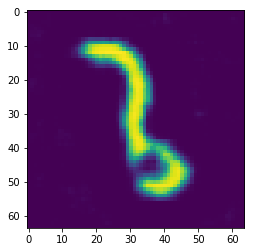

epoch: 37, step: 100, d_loss: 0.0169, g_loss:5.2970, real_score: 0.99,fake_score: 0.01
epoch: 37, step: 200, d_loss: 0.0386, g_loss:4.3790, real_score: 1.00,fake_score: 0.03
epoch: 37, step: 300, d_loss: 2.5238, g_loss:8.0569, real_score: 1.00,fake_score: 0.00
epoch: 37, step: 400, d_loss: 0.2649, g_loss:2.7488, real_score: 0.88,fake_score: 0.11
epoch: 37, step: 500, d_loss: 0.1188, g_loss:5.2880, real_score: 0.95,fake_score: 0.01
epoch: 37, step: 600, d_loss: 0.0500, g_loss:6.3792, real_score: 0.96,fake_score: 0.00
tensor([38], device='cuda:0')
tensor([[0.0333]], device='cuda:0', grad_fn=<IndexBackward>)


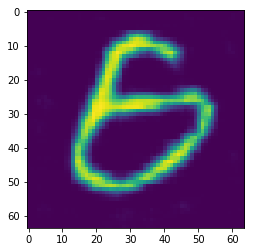

epoch: 38, step: 100, d_loss: 0.1882, g_loss:5.2553, real_score: 0.96,fake_score: 0.01
epoch: 38, step: 200, d_loss: 0.0707, g_loss:3.4362, real_score: 0.99,fake_score: 0.06
epoch: 38, step: 300, d_loss: 0.0482, g_loss:3.9322, real_score: 0.99,fake_score: 0.03
epoch: 38, step: 400, d_loss: 0.0142, g_loss:5.0163, real_score: 0.99,fake_score: 0.02
epoch: 38, step: 500, d_loss: 0.0321, g_loss:5.6575, real_score: 0.97,fake_score: 0.01
epoch: 38, step: 600, d_loss: 0.0904, g_loss:6.1300, real_score: 0.92,fake_score: 0.00
tensor([32], device='cuda:0')
tensor([[0.0478]], device='cuda:0', grad_fn=<IndexBackward>)


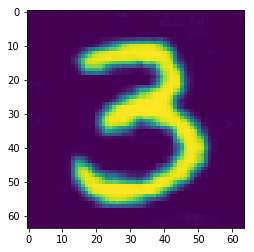

epoch: 39, step: 100, d_loss: 0.2021, g_loss:2.4022, real_score: 0.97,fake_score: 0.16
epoch: 39, step: 200, d_loss: 0.0343, g_loss:10.5191, real_score: 0.97,fake_score: 0.00
epoch: 39, step: 300, d_loss: 0.0456, g_loss:4.1141, real_score: 0.96,fake_score: 0.04
epoch: 39, step: 400, d_loss: 0.0610, g_loss:4.9640, real_score: 0.98,fake_score: 0.02
epoch: 39, step: 500, d_loss: 0.0545, g_loss:4.4113, real_score: 0.98,fake_score: 0.02
epoch: 39, step: 600, d_loss: 0.1300, g_loss:3.0947, real_score: 0.99,fake_score: 0.08
tensor([42], device='cuda:0')
tensor([[0.4017]], device='cuda:0', grad_fn=<IndexBackward>)


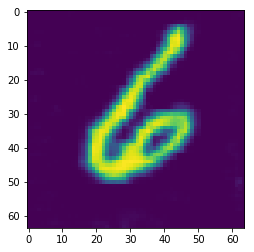

epoch: 40, step: 100, d_loss: 0.0153, g_loss:4.3946, real_score: 0.99,fake_score: 0.02
epoch: 40, step: 200, d_loss: 0.0367, g_loss:5.1797, real_score: 1.00,fake_score: 0.01
epoch: 40, step: 300, d_loss: 0.0197, g_loss:5.5029, real_score: 1.00,fake_score: 0.01
epoch: 40, step: 400, d_loss: 0.0340, g_loss:5.5209, real_score: 0.97,fake_score: 0.01
epoch: 40, step: 500, d_loss: 0.0163, g_loss:5.7723, real_score: 0.99,fake_score: 0.01
epoch: 40, step: 600, d_loss: 0.0208, g_loss:6.8104, real_score: 0.99,fake_score: 0.00
tensor([31], device='cuda:0')
tensor([[0.0357]], device='cuda:0', grad_fn=<IndexBackward>)


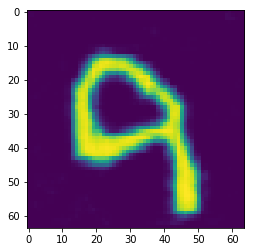

epoch: 41, step: 100, d_loss: 0.0244, g_loss:5.1917, real_score: 0.98,fake_score: 0.01
epoch: 41, step: 200, d_loss: 0.0770, g_loss:3.8277, real_score: 1.00,fake_score: 0.05
epoch: 41, step: 300, d_loss: 0.0531, g_loss:3.2574, real_score: 0.97,fake_score: 0.09
epoch: 41, step: 400, d_loss: 0.5098, g_loss:1.4942, real_score: 0.75,fake_score: 0.34
epoch: 41, step: 500, d_loss: 0.3261, g_loss:4.5115, real_score: 0.80,fake_score: 0.02
epoch: 41, step: 600, d_loss: 0.2036, g_loss:6.0207, real_score: 0.98,fake_score: 0.01
tensor([26], device='cuda:0')
tensor([[0.1492]], device='cuda:0', grad_fn=<IndexBackward>)


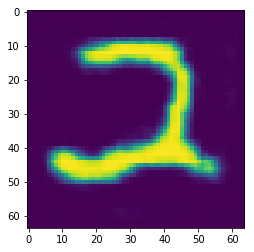

epoch: 42, step: 100, d_loss: 0.1181, g_loss:6.1595, real_score: 0.91,fake_score: 0.00
epoch: 42, step: 200, d_loss: 0.1324, g_loss:1.6747, real_score: 0.98,fake_score: 0.28
epoch: 42, step: 300, d_loss: 0.3061, g_loss:2.6534, real_score: 1.00,fake_score: 0.13
epoch: 42, step: 400, d_loss: 0.1225, g_loss:3.1800, real_score: 0.98,fake_score: 0.07
epoch: 42, step: 500, d_loss: 0.0431, g_loss:4.7188, real_score: 0.97,fake_score: 0.01
epoch: 42, step: 600, d_loss: 0.0838, g_loss:5.3035, real_score: 1.00,fake_score: 0.01
tensor([70], device='cuda:0')
tensor([[0.1828]], device='cuda:0', grad_fn=<IndexBackward>)


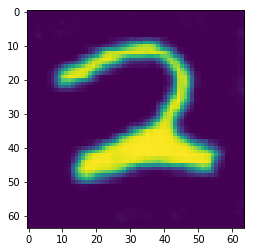

epoch: 43, step: 100, d_loss: 0.0272, g_loss:5.4405, real_score: 0.99,fake_score: 0.01
epoch: 43, step: 200, d_loss: 0.0295, g_loss:4.7651, real_score: 0.98,fake_score: 0.02
epoch: 43, step: 300, d_loss: 0.0268, g_loss:3.0710, real_score: 0.99,fake_score: 0.08
epoch: 43, step: 400, d_loss: 0.0562, g_loss:4.2530, real_score: 0.99,fake_score: 0.03
epoch: 43, step: 500, d_loss: 0.0233, g_loss:4.3771, real_score: 0.99,fake_score: 0.02
epoch: 43, step: 600, d_loss: 0.0499, g_loss:5.1048, real_score: 0.96,fake_score: 0.01
tensor([52], device='cuda:0')
tensor([[0.0885]], device='cuda:0', grad_fn=<IndexBackward>)


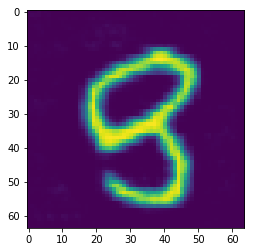

epoch: 44, step: 100, d_loss: 0.0204, g_loss:6.8199, real_score: 0.98,fake_score: 0.00
epoch: 44, step: 200, d_loss: 0.0380, g_loss:6.0853, real_score: 0.97,fake_score: 0.00
epoch: 44, step: 300, d_loss: 0.0318, g_loss:5.7089, real_score: 0.99,fake_score: 0.01
epoch: 44, step: 400, d_loss: 0.0142, g_loss:4.1822, real_score: 0.99,fake_score: 0.03
epoch: 44, step: 500, d_loss: 0.0166, g_loss:4.8124, real_score: 1.00,fake_score: 0.02
epoch: 44, step: 600, d_loss: 0.0100, g_loss:7.3669, real_score: 0.99,fake_score: 0.00
tensor([51], device='cuda:0')
tensor([[0.0126]], device='cuda:0', grad_fn=<IndexBackward>)


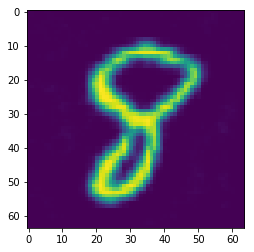

epoch: 45, step: 100, d_loss: 0.0172, g_loss:6.3073, real_score: 0.99,fake_score: 0.00
epoch: 45, step: 200, d_loss: 0.0144, g_loss:5.3293, real_score: 0.99,fake_score: 0.01
epoch: 45, step: 300, d_loss: 0.0100, g_loss:4.5866, real_score: 0.99,fake_score: 0.02
epoch: 45, step: 400, d_loss: 0.2327, g_loss:1.6490, real_score: 0.94,fake_score: 0.34
epoch: 45, step: 500, d_loss: 0.6455, g_loss:2.8534, real_score: 0.63,fake_score: 0.10
epoch: 45, step: 600, d_loss: 0.0715, g_loss:4.6609, real_score: 0.95,fake_score: 0.02
tensor([14], device='cuda:0')
tensor([[0.1660]], device='cuda:0', grad_fn=<IndexBackward>)


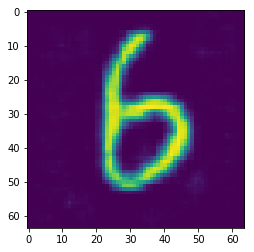

epoch: 46, step: 100, d_loss: 0.0186, g_loss:4.7375, real_score: 0.99,fake_score: 0.02
epoch: 46, step: 200, d_loss: 0.0264, g_loss:5.0471, real_score: 0.99,fake_score: 0.01
epoch: 46, step: 300, d_loss: 0.0203, g_loss:5.3490, real_score: 0.99,fake_score: 0.01
epoch: 46, step: 400, d_loss: 0.0297, g_loss:5.2113, real_score: 0.99,fake_score: 0.01
epoch: 46, step: 500, d_loss: 0.3194, g_loss:2.3400, real_score: 0.93,fake_score: 0.21
epoch: 46, step: 600, d_loss: 0.0325, g_loss:6.1759, real_score: 0.98,fake_score: 0.01
tensor([91], device='cuda:0')
tensor([[0.1138]], device='cuda:0', grad_fn=<IndexBackward>)


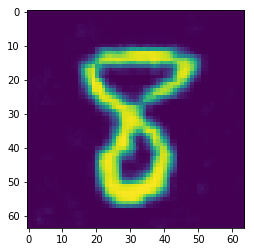

epoch: 47, step: 100, d_loss: 0.0784, g_loss:5.3466, real_score: 0.98,fake_score: 0.01
epoch: 47, step: 200, d_loss: 0.0200, g_loss:5.1863, real_score: 1.00,fake_score: 0.02
epoch: 47, step: 300, d_loss: 0.0251, g_loss:3.9373, real_score: 0.99,fake_score: 0.04
epoch: 47, step: 400, d_loss: 0.0195, g_loss:6.0217, real_score: 0.99,fake_score: 0.00
epoch: 47, step: 500, d_loss: 0.0137, g_loss:4.8011, real_score: 1.00,fake_score: 0.02
epoch: 47, step: 600, d_loss: 0.0179, g_loss:5.5546, real_score: 1.00,fake_score: 0.01
tensor([68], device='cuda:0')
tensor([[0.0570]], device='cuda:0', grad_fn=<IndexBackward>)


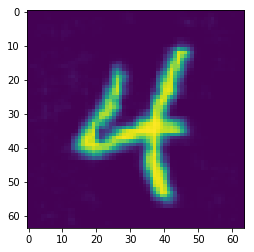

epoch: 48, step: 100, d_loss: 0.5313, g_loss:3.6473, real_score: 1.00,fake_score: 0.08
epoch: 48, step: 200, d_loss: 0.0394, g_loss:3.9952, real_score: 0.99,fake_score: 0.04
epoch: 48, step: 300, d_loss: 0.0125, g_loss:5.4776, real_score: 1.00,fake_score: 0.01
epoch: 48, step: 400, d_loss: 0.0430, g_loss:5.8988, real_score: 0.96,fake_score: 0.01
epoch: 48, step: 500, d_loss: 0.0279, g_loss:5.5751, real_score: 0.98,fake_score: 0.01
epoch: 48, step: 600, d_loss: 0.0191, g_loss:4.9284, real_score: 1.00,fake_score: 0.01
tensor([29], device='cuda:0')
tensor([[0.0906]], device='cuda:0', grad_fn=<IndexBackward>)


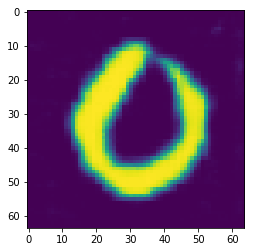

epoch: 49, step: 100, d_loss: 0.0085, g_loss:7.4559, real_score: 1.00,fake_score: 0.00
epoch: 49, step: 200, d_loss: 0.0079, g_loss:5.9161, real_score: 1.00,fake_score: 0.01
epoch: 49, step: 300, d_loss: 0.0329, g_loss:6.4728, real_score: 0.97,fake_score: 0.00
epoch: 49, step: 400, d_loss: 0.0404, g_loss:4.0640, real_score: 1.00,fake_score: 0.04
epoch: 49, step: 500, d_loss: 0.0070, g_loss:4.8525, real_score: 1.00,fake_score: 0.02
epoch: 49, step: 600, d_loss: 0.0088, g_loss:8.5962, real_score: 0.99,fake_score: 0.00
tensor([75], device='cuda:0')
tensor([[0.0048]], device='cuda:0', grad_fn=<IndexBackward>)


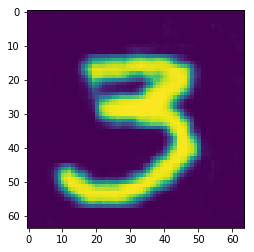

epoch: 50, step: 100, d_loss: 0.0586, g_loss:4.8564, real_score: 1.00,fake_score: 0.02
epoch: 50, step: 200, d_loss: 0.0104, g_loss:5.5902, real_score: 1.00,fake_score: 0.01
epoch: 50, step: 300, d_loss: 0.0451, g_loss:8.9691, real_score: 1.00,fake_score: 0.00
epoch: 50, step: 400, d_loss: 0.7316, g_loss:4.5120, real_score: 0.71,fake_score: 0.04
epoch: 50, step: 500, d_loss: 0.1438, g_loss:5.8897, real_score: 0.90,fake_score: 0.01
epoch: 50, step: 600, d_loss: 0.3647, g_loss:6.0744, real_score: 0.75,fake_score: 0.01
tensor([41], device='cuda:0')
tensor([[0.0638]], device='cuda:0', grad_fn=<IndexBackward>)


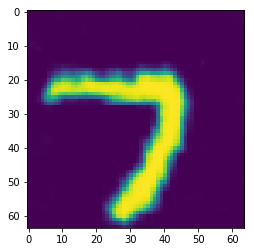

epoch: 51, step: 100, d_loss: 0.3870, g_loss:4.9201, real_score: 0.74,fake_score: 0.02
epoch: 51, step: 200, d_loss: 0.0997, g_loss:7.1118, real_score: 0.93,fake_score: 0.00
epoch: 51, step: 300, d_loss: 0.0603, g_loss:6.4908, real_score: 0.99,fake_score: 0.00
epoch: 51, step: 400, d_loss: 0.0563, g_loss:4.5098, real_score: 0.99,fake_score: 0.02
epoch: 51, step: 500, d_loss: 0.0183, g_loss:6.0824, real_score: 0.99,fake_score: 0.00
epoch: 51, step: 600, d_loss: 0.0418, g_loss:6.5562, real_score: 0.98,fake_score: 0.00
tensor([39], device='cuda:0')
tensor([[0.0269]], device='cuda:0', grad_fn=<IndexBackward>)


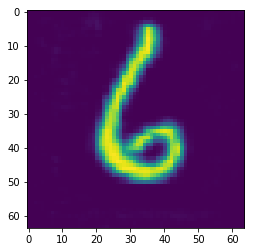

epoch: 52, step: 100, d_loss: 0.0315, g_loss:6.3231, real_score: 0.98,fake_score: 0.00
epoch: 52, step: 200, d_loss: 0.0202, g_loss:5.8920, real_score: 0.98,fake_score: 0.01
epoch: 52, step: 300, d_loss: 0.0263, g_loss:5.8644, real_score: 0.98,fake_score: 0.01
epoch: 52, step: 400, d_loss: 0.0530, g_loss:4.3867, real_score: 0.96,fake_score: 0.02
epoch: 52, step: 500, d_loss: 0.0239, g_loss:4.8424, real_score: 1.00,fake_score: 0.02
epoch: 52, step: 600, d_loss: 0.0272, g_loss:7.1009, real_score: 0.98,fake_score: 0.00
tensor([92], device='cuda:0')
tensor([[0.0183]], device='cuda:0', grad_fn=<IndexBackward>)


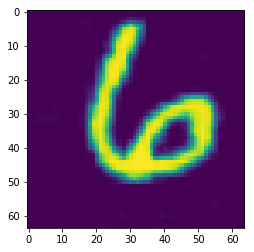

epoch: 53, step: 100, d_loss: 0.0157, g_loss:4.9451, real_score: 1.00,fake_score: 0.02
epoch: 53, step: 200, d_loss: 0.0174, g_loss:6.9636, real_score: 0.99,fake_score: 0.00
epoch: 53, step: 300, d_loss: 0.0315, g_loss:6.8204, real_score: 0.97,fake_score: 0.00
epoch: 53, step: 400, d_loss: 0.0135, g_loss:6.2815, real_score: 0.99,fake_score: 0.01
epoch: 53, step: 500, d_loss: 0.0288, g_loss:3.2622, real_score: 1.00,fake_score: 0.08
epoch: 53, step: 600, d_loss: 0.0224, g_loss:5.4406, real_score: 0.99,fake_score: 0.01
tensor([17], device='cuda:0')
tensor([[0.0659]], device='cuda:0', grad_fn=<IndexBackward>)


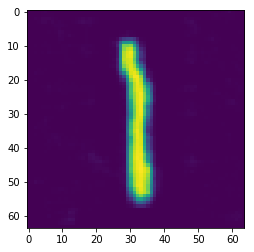

epoch: 54, step: 100, d_loss: 2.2102, g_loss:3.1756, real_score: 0.28,fake_score: 0.11
epoch: 54, step: 200, d_loss: 0.2166, g_loss:3.4432, real_score: 0.87,fake_score: 0.08
epoch: 54, step: 300, d_loss: 0.1808, g_loss:3.2843, real_score: 0.99,fake_score: 0.07
epoch: 54, step: 400, d_loss: 0.0369, g_loss:3.6101, real_score: 1.00,fake_score: 0.06
epoch: 54, step: 500, d_loss: 0.0335, g_loss:6.5417, real_score: 0.97,fake_score: 0.00
epoch: 54, step: 600, d_loss: 0.0149, g_loss:6.8688, real_score: 0.99,fake_score: 0.00
tensor([36], device='cuda:0')
tensor([[0.0123]], device='cuda:0', grad_fn=<IndexBackward>)


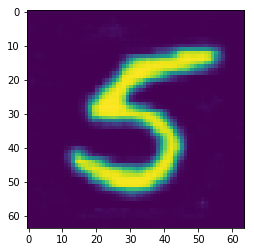

epoch: 55, step: 100, d_loss: 0.0453, g_loss:6.4810, real_score: 0.97,fake_score: 0.00
epoch: 55, step: 200, d_loss: 0.0193, g_loss:5.4305, real_score: 1.00,fake_score: 0.01
epoch: 55, step: 300, d_loss: 0.0236, g_loss:6.2871, real_score: 0.98,fake_score: 0.01
epoch: 55, step: 400, d_loss: 0.0229, g_loss:4.6598, real_score: 1.00,fake_score: 0.02
epoch: 55, step: 500, d_loss: 0.0124, g_loss:6.1956, real_score: 1.00,fake_score: 0.00
epoch: 55, step: 600, d_loss: 0.0222, g_loss:5.4863, real_score: 0.98,fake_score: 0.01
tensor([70], device='cuda:0')
tensor([[0.1040]], device='cuda:0', grad_fn=<IndexBackward>)


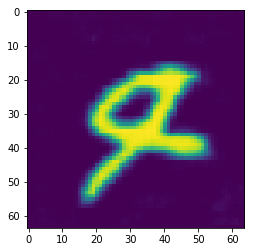

epoch: 56, step: 100, d_loss: 0.4170, g_loss:6.3589, real_score: 0.73,fake_score: 0.01
epoch: 56, step: 200, d_loss: 0.0264, g_loss:3.3120, real_score: 1.00,fake_score: 0.08
epoch: 56, step: 300, d_loss: 0.0196, g_loss:5.6389, real_score: 0.99,fake_score: 0.01
epoch: 56, step: 400, d_loss: 0.0672, g_loss:6.2652, real_score: 0.94,fake_score: 0.00
epoch: 56, step: 500, d_loss: 0.0357, g_loss:6.3781, real_score: 1.00,fake_score: 0.00
epoch: 56, step: 600, d_loss: 0.0276, g_loss:7.3235, real_score: 0.97,fake_score: 0.00
tensor([2], device='cuda:0')
tensor([[0.0171]], device='cuda:0', grad_fn=<IndexBackward>)


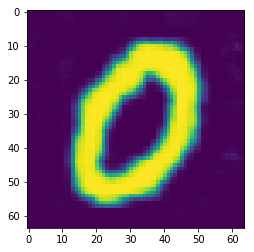

epoch: 57, step: 100, d_loss: 0.0335, g_loss:7.7071, real_score: 0.97,fake_score: 0.00
epoch: 57, step: 200, d_loss: 0.0137, g_loss:5.8608, real_score: 1.00,fake_score: 0.00
epoch: 57, step: 300, d_loss: 0.0129, g_loss:6.8344, real_score: 0.99,fake_score: 0.00
epoch: 57, step: 400, d_loss: 0.0134, g_loss:7.6210, real_score: 0.99,fake_score: 0.00
epoch: 57, step: 500, d_loss: 0.0224, g_loss:8.0858, real_score: 0.98,fake_score: 0.00
epoch: 57, step: 600, d_loss: 0.0134, g_loss:7.4316, real_score: 1.00,fake_score: 0.00
tensor([70], device='cuda:0')
tensor([[0.0171]], device='cuda:0', grad_fn=<IndexBackward>)


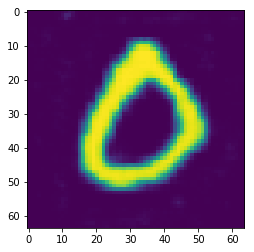

epoch: 58, step: 100, d_loss: 0.1093, g_loss:2.3463, real_score: 0.98,fake_score: 0.22
epoch: 58, step: 200, d_loss: 0.0914, g_loss:3.8326, real_score: 0.99,fake_score: 0.06
epoch: 58, step: 300, d_loss: 0.0332, g_loss:7.6595, real_score: 0.97,fake_score: 0.00
epoch: 58, step: 400, d_loss: 0.0190, g_loss:6.2384, real_score: 1.00,fake_score: 0.00
epoch: 58, step: 500, d_loss: 0.0261, g_loss:5.2124, real_score: 0.99,fake_score: 0.01
epoch: 58, step: 600, d_loss: 0.0603, g_loss:5.6798, real_score: 1.00,fake_score: 0.01
tensor([95], device='cuda:0')
tensor([[0.2024]], device='cuda:0', grad_fn=<IndexBackward>)


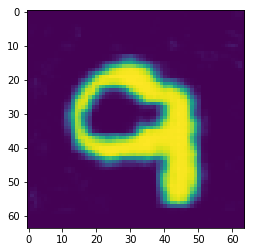

epoch: 59, step: 100, d_loss: 0.0414, g_loss:6.1126, real_score: 0.96,fake_score: 0.01
epoch: 59, step: 200, d_loss: 0.0205, g_loss:5.0703, real_score: 0.99,fake_score: 0.01
epoch: 59, step: 300, d_loss: 0.0139, g_loss:5.4316, real_score: 1.00,fake_score: 0.01
epoch: 59, step: 400, d_loss: 0.0120, g_loss:4.3696, real_score: 0.99,fake_score: 0.03
epoch: 59, step: 500, d_loss: 0.1710, g_loss:3.8382, real_score: 0.95,fake_score: 0.08
epoch: 59, step: 600, d_loss: 0.0063, g_loss:8.1550, real_score: 1.00,fake_score: 0.00
tensor([11], device='cuda:0')
tensor([[0.0775]], device='cuda:0', grad_fn=<IndexBackward>)


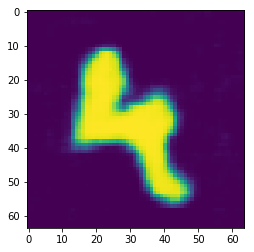

epoch: 60, step: 100, d_loss: 0.0141, g_loss:8.0462, real_score: 1.00,fake_score: 0.00
epoch: 60, step: 200, d_loss: 0.0146, g_loss:8.3587, real_score: 0.99,fake_score: 0.00
epoch: 60, step: 300, d_loss: 0.0116, g_loss:7.6354, real_score: 0.99,fake_score: 0.00
epoch: 60, step: 400, d_loss: 0.0210, g_loss:5.4451, real_score: 0.99,fake_score: 0.01
epoch: 60, step: 500, d_loss: 0.0165, g_loss:6.6895, real_score: 0.99,fake_score: 0.00
epoch: 60, step: 600, d_loss: 0.0167, g_loss:7.8787, real_score: 0.99,fake_score: 0.00
tensor([59], device='cuda:0')
tensor([[0.0118]], device='cuda:0', grad_fn=<IndexBackward>)


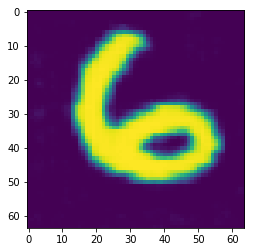

epoch: 61, step: 100, d_loss: 0.0090, g_loss:7.1386, real_score: 0.99,fake_score: 0.00
epoch: 61, step: 200, d_loss: 0.0182, g_loss:5.9213, real_score: 0.99,fake_score: 0.01
epoch: 61, step: 300, d_loss: 0.0203, g_loss:5.3330, real_score: 1.00,fake_score: 0.01
epoch: 61, step: 400, d_loss: 0.0187, g_loss:6.7371, real_score: 0.98,fake_score: 0.00
epoch: 61, step: 500, d_loss: 0.0269, g_loss:5.2518, real_score: 0.99,fake_score: 0.01
epoch: 61, step: 600, d_loss: 0.0248, g_loss:13.6100, real_score: 0.98,fake_score: 0.00
tensor([39], device='cuda:0')
tensor([[0.0002]], device='cuda:0', grad_fn=<IndexBackward>)


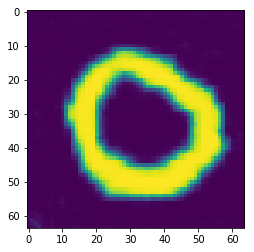

epoch: 62, step: 100, d_loss: 0.0921, g_loss:7.3037, real_score: 0.92,fake_score: 0.00
epoch: 62, step: 200, d_loss: 0.0513, g_loss:7.0541, real_score: 0.96,fake_score: 0.00
epoch: 62, step: 300, d_loss: 0.0162, g_loss:8.0470, real_score: 0.99,fake_score: 0.00
epoch: 62, step: 400, d_loss: 0.0570, g_loss:4.6411, real_score: 0.97,fake_score: 0.03
epoch: 62, step: 500, d_loss: 0.0184, g_loss:6.7314, real_score: 0.99,fake_score: 0.00
epoch: 62, step: 600, d_loss: 0.0130, g_loss:5.4490, real_score: 1.00,fake_score: 0.01
tensor([94], device='cuda:0')
tensor([[0.0739]], device='cuda:0', grad_fn=<IndexBackward>)


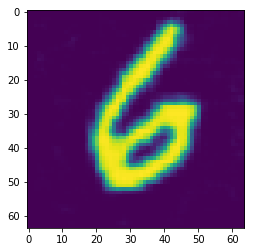

epoch: 63, step: 100, d_loss: 0.0082, g_loss:3.5777, real_score: 1.00,fake_score: 0.06
epoch: 63, step: 200, d_loss: 0.0319, g_loss:9.0905, real_score: 0.97,fake_score: 0.00
epoch: 63, step: 300, d_loss: 0.0168, g_loss:5.2218, real_score: 1.00,fake_score: 0.01
epoch: 63, step: 400, d_loss: 0.0039, g_loss:7.1994, real_score: 1.00,fake_score: 0.00
epoch: 63, step: 500, d_loss: 0.0092, g_loss:7.1095, real_score: 1.00,fake_score: 0.00
epoch: 63, step: 600, d_loss: 0.0046, g_loss:6.9404, real_score: 1.00,fake_score: 0.00
tensor([2], device='cuda:0')
tensor([[0.0471]], device='cuda:0', grad_fn=<IndexBackward>)


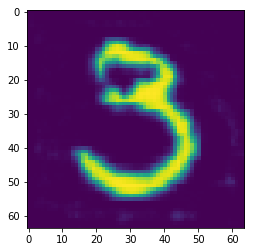

In [4]:
transform = transforms.Compose([
        transforms.Resize(64),
        transforms.ToTensor(),
        transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
    ])
mnist_dataset = datasets.MNIST(root="../../data", train=True, 
                               download=True, transform=transform)
data_loader = torch.utils.data.DataLoader(dataset=mnist_dataset, 
                                         batch_size=batch_size,
                                         shuffle=True)
G_net = DC_Generator().cuda()
G_net.weight_init(mean=0.0, std=0.02)
D_net = DC_Distinguisher().to(device)
D_net.weight_init(mean=0.0, std=0.02)
G_optim = torch.optim.Adam(G_net.parameters(), lr=2e-4)
D_optim = torch.optim.Adam(D_net.parameters(), lr=2e-4)

print("preparation done")
for epoch in range(config.epoch):
    for idx, (images, _) in enumerate(data_loader):
        images = images.reshape(batch_size, -1, 64, 64).to(device)
        real_labels = torch.ones(batch_size, 1).to(device)
        fake_labels = torch.zeros(batch_size, 1).to(device)
        #train D_net
        if idx % 2 == 0:
            outputs = D_net(images)
            d_loss = nn.BCELoss()(outputs, real_labels)
            real_score = torch.mean(outputs).item()
        
            gaussian_noise = torch.randn(batch_size, latent_size, 1, 1).to(device)
            fake_images = G_net(gaussian_noise)
            outputs = D_net(fake_images)
            d_loss += nn.BCELoss()(outputs, fake_labels)
        
            G_optim.zero_grad()
            D_optim.zero_grad()
            d_loss.backward()
            D_optim.step()
        
        #train G_net
        gaussian_noise = torch.randn(batch_size, latent_size, 1, 1).to(device)
        fake_images = G_net(gaussian_noise)
        outputs = D_net(fake_images)
        fake_score = torch.mean(outputs).item()
        g_loss = nn.BCELoss()(outputs, real_labels)
        G_optim.zero_grad()
        D_optim.zero_grad()
        g_loss.backward()
        G_optim.step()
        
        if (idx + 1) % 100 == 0:
            print('epoch: {}, step: {}, d_loss: {:.4f}, g_loss:{:.4f}, real_score: {:.2f},fake_score: {:.2f}'
                 .format(epoch, idx+1, d_loss.item(), g_loss.item(), 
                        real_score, fake_score))
    fake_images = fake_images.reshape(fake_images.size(0), 64, 64)
    fake_image_id = torch.argmax(outputs.view(batch_size, 1), dim=0)
    print(fake_image_id)
    print(outputs.view(batch_size, 1)[fake_image_id])
    plt.imshow(fake_images[fake_image_id].detach().cpu().numpy()[0])
    plt.show()
    